<a href="https://colab.research.google.com/github/katusabevictoria/katusabevictoria/blob/main/Data_Visualization_Core_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Core- Victoria K [Starter Notebook]

- Student Name: KATUSABE VICTORIA

## Import Packages and Load Data

In [1]:
# import the required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Save the filepath to the data as a variable "fpath"
fpath='/content/drive/MyDrive/Week 3/insurance_mod (3).csv'

In [4]:
import pandas as pd
df=pd.read_csv(fpath)

In [5]:
# Read in the file and disply the info and head
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0


## Explore Correlation

### 1\) Correlation Heatmap

1a) Define a variable containing the correlations between variables in the insurance dataset.

In [7]:
# Find correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,age,bmi,children,smoker,charges
age,1.00,0.11,0.04,-0.03,0.30
bmi,0.11,1.00,0.01,0.00,0.20
children,0.04,0.01,1.00,0.01,0.07
smoker,-0.03,0.00,0.01,1.00,0.79
charges,0.30,0.20,0.07,0.79,1.00


1b) Make a heatmap of the correlations and annote with the values.

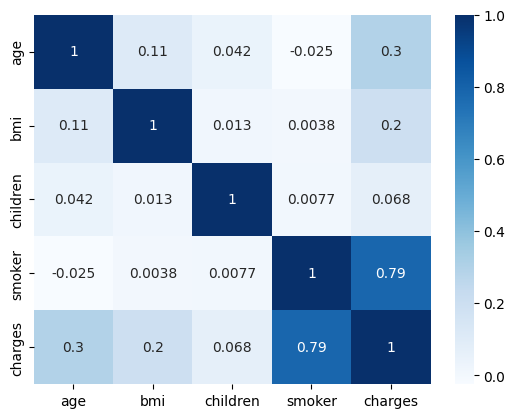

In [8]:
# Make a heatmap using the correlations from above
sns.heatmap(corr, cmap = 'Blues', annot = True);

1c) **Are there arny strong correlations?
Is it a positive or negative correlation?**

- Your Answer:
  - Yes there is a strong positive correlation.


## Explore Charges vs. Smokers

### 2\) Barplot - Charges for Smokers vs. Non-Smokers

2a) Make a barplot to visualize the mean of charges for smokers and nonsmokers.

<ipython-input-18-3735478cc86c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker', y='charges', data=mean_charges, palette='viridis')


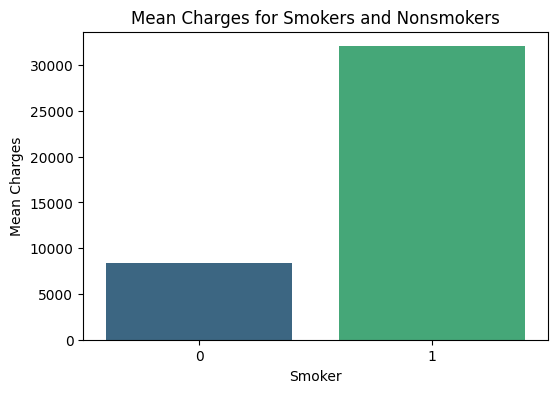

In [18]:
# Make a barplot of smoker vs charges
mean_charges = df.groupby('smoker')['charges'].mean().reset_index()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='smoker', y='charges', data=mean_charges, palette='viridis')
plt.title('Mean Charges for Smokers and Nonsmokers')
plt.xlabel('Smoker')
plt.ylabel('Mean Charges')
plt.show()

2b) Is the mean of charges higher for smokers or nonsmokers? ((In a future course, you will explore how to calculate the statistical significance of this difference)

- Your Answer:
  -  The mean of charges is higher for smokers.

### 3\) Boxplot - Charges for Smokers vs. Non-Smokers


3a) Create a boxplot with x as smokers and y as charges.


<ipython-input-17-04522e848bef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')


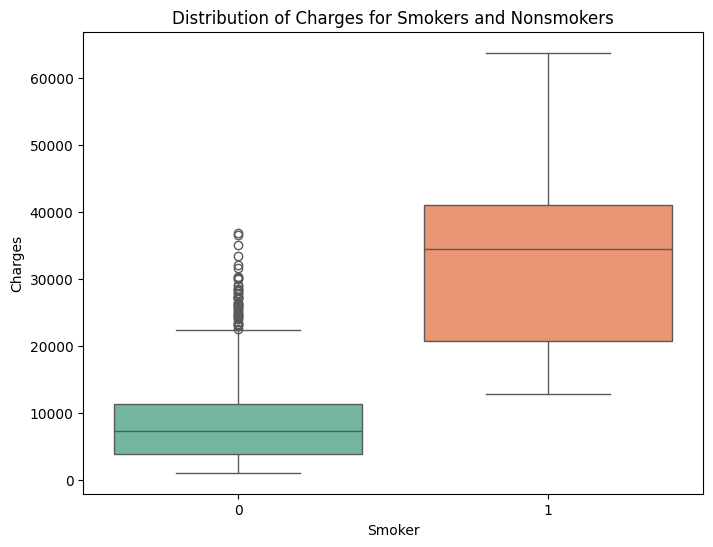

In [17]:
# Create a boxplot of smoker vs. charges
# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Distribution of Charges for Smokers and Nonsmokers')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


3b) What information does this include that you could not see in your bar chart?
- Answer(s):
  - There are outliers in the non smokers.

## Explore Charges for Males vs. Females

### 4\) Barplot - Charges for Males vs. Females

4a) Make a searborn barplot to visualize the difference in charges between males and females.

<ipython-input-15-36c403b7ce43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='charges', data=df, palette='Set2')


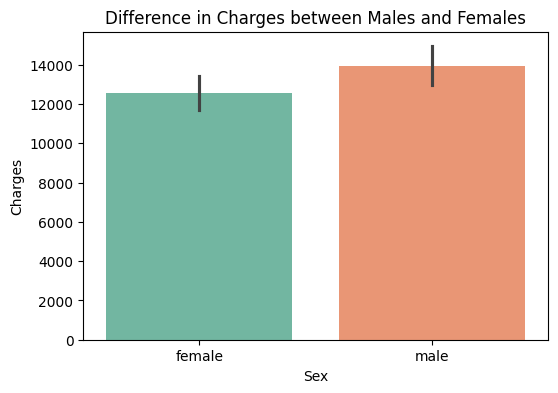

In [15]:
# Make a barplot of sex vs. charges
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='charges', data=df, palette='Set2')
plt.title('Difference in Charges between Males and Females')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

4b)  Is the mean of charges higher for males or females?

- Your Answer:
  - The mean of charges is higher for males.

### 5\) Grouped Barplot - Charges by Sex and Smoker

5a\) Create a seaborn barplot to visualize the diference between insurance charges grouped by Smoker (on the x-axis), and Sex (the hue).

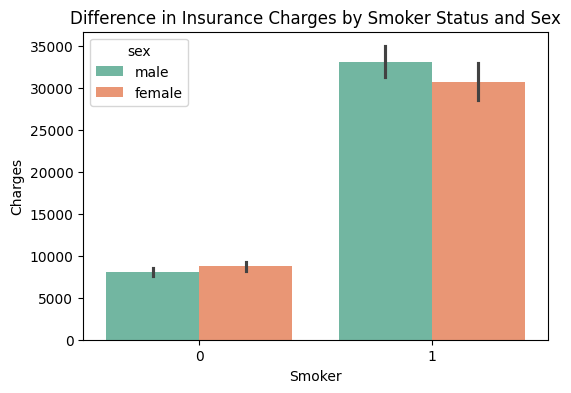

In [14]:
# Create a barplot of smoker vs charges, colored by sex
plt.figure(figsize=(6, 4))
sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='Set2')
plt.title('Difference in Insurance Charges by Smoker Status and Sex')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

5b\) What do you observe? Which of the 4 groups has the highest average charges?
- Your Answer:
  - The male group has the highest average charges.

## Explore Age vs. Charges

### 6\) Scatter Plot - Age vs. Charges

6a) Make a scatterplot to visualize the relationship between charges and age for the entire dataset

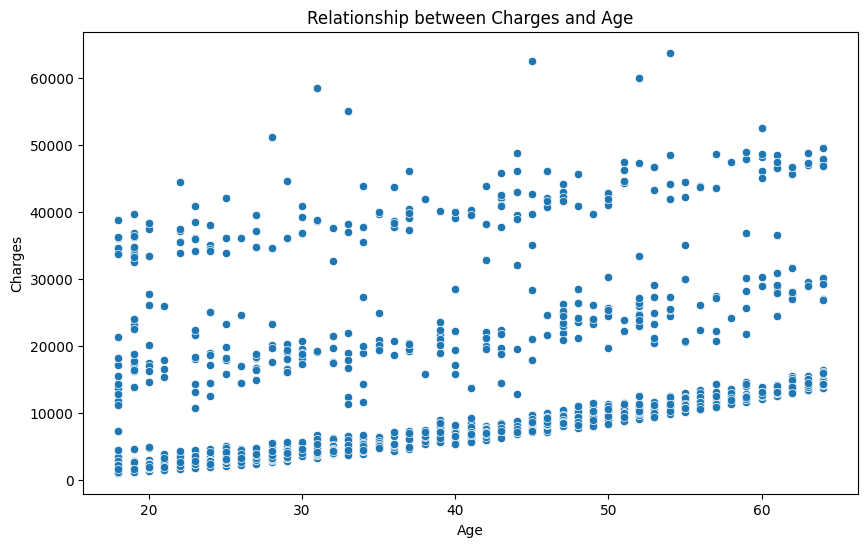

In [ ]:
# Create a scatter plot of age vs charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Relationship between Charges and Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

6b) Desribe what you notice from the visualization.
- Your Answer:
  - There is relatively a low increse in charges against the relatively higher increase in age.

### 7\)  Grouped Scatter Plot - Age vs. Charges, colored by Smoker

7a) Make a scatterplot to visualize the relationship between charges and age, but colored by smoker or not.

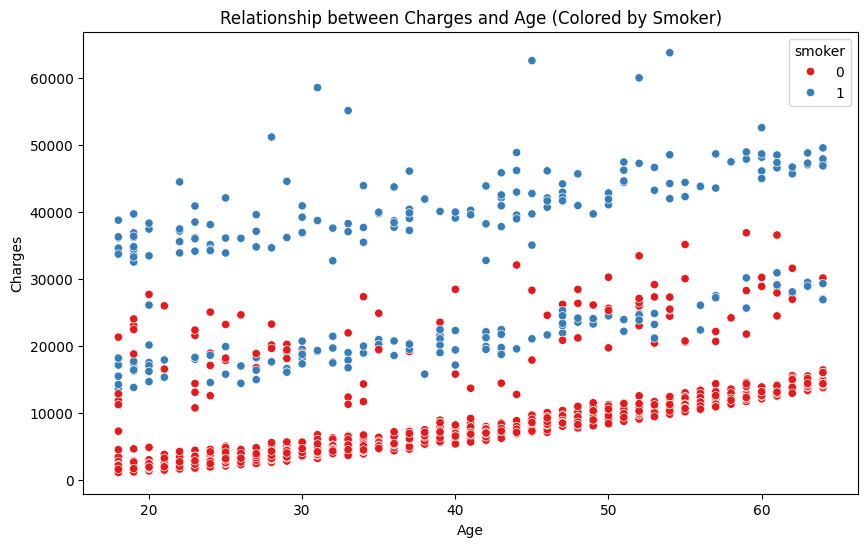

In [ ]:
# make another scatterplot of age vs charges, but colored by smoker
# (using seaborn will make this easy)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='Set1')
plt.title('Relationship between Charges and Age (Colored by Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

7b) Desribe what you notice from the visualization.

- Your Answer:
  - There is a relatively low increase in charges against the relatively higher increase in age of non smokers.

### 8\) Grouped Scatter Plot - Age vs. Charges, colored by Sex

8a) Make a scatterplot to visualize the relationship between charges and age, but colored by sex.

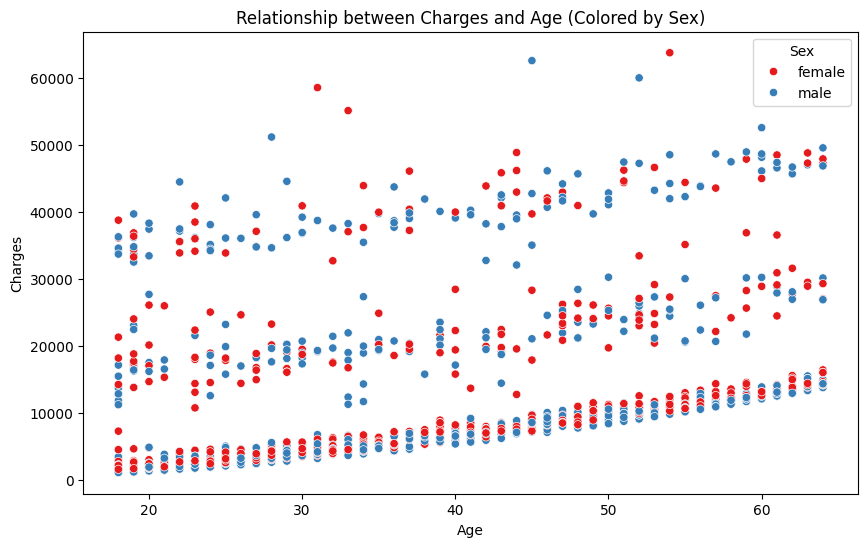

In [ ]:
# make another scatterplot of charges vs age, but this time color the dots by sex
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='sex', data=df, palette='Set1')
plt.title('Relationship between Charges and Age (Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Sex')
plt.show()

8b) Describe what you notice from the visualization

- Your Answer:
  - There is a relatively low increase in charges agnait the higher increase in the age of both male and female.

## Explore BMI

### 9\) Regplot - Charges vs. BMI

9a) Make a seaborn regplot to visualize the relationship between charges and bmi for the entire dataset

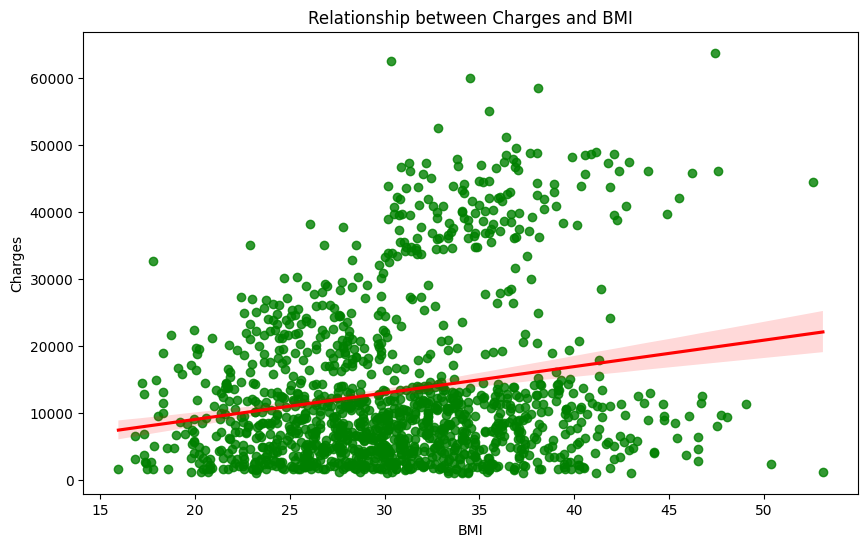

In [19]:
# Make a seaborn regplot for bmi vs. charges.
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Relationship between Charges and BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

9b\) What do you notice from the visualization? *(There are many correct answers.)*

- Your Answer:
  - There is a higher increase in the BMI and a lower increase in charges.
  - There is low BMI at increased charges.

### 10\) Scatterplot - Charges vs. BMI - Colored by Smoker

10a) Make a scatterplot to visualize the relationship between charges and bmi colored by smoker or not

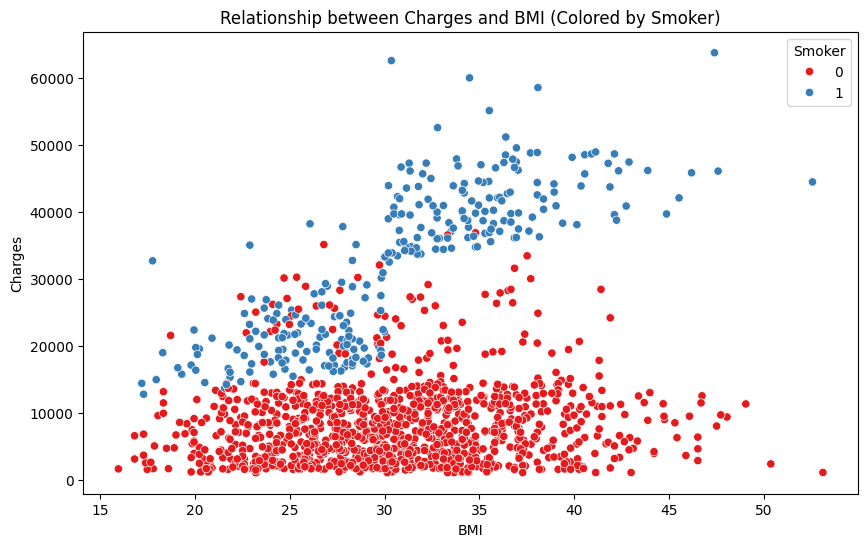

In [ ]:
# Make a scatterplot of bmi vs charges, colored by smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set1')
plt.title('Relationship between Charges and BMI (Colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

10b) What do you notice from the visualization? (There are many correct answers.)

- Your Answer:
  - There is a relatively high increase of BMI for non smokers with a relatively low increase in charges.
  - There is a relatively high increase of BMI for smokers with a relatively higher increase in charges.

### 11\)  Linear Model Plot - Charges vs. BMI - Colored by Smoker



11a) Compare the relationship of bmi and charges for smokers and nonsmokers using seaborn's `lmplot` to calculate a separate trendline for Smokers vs. Non-Smokers.


<Figure size 1000x600 with 0 Axes>

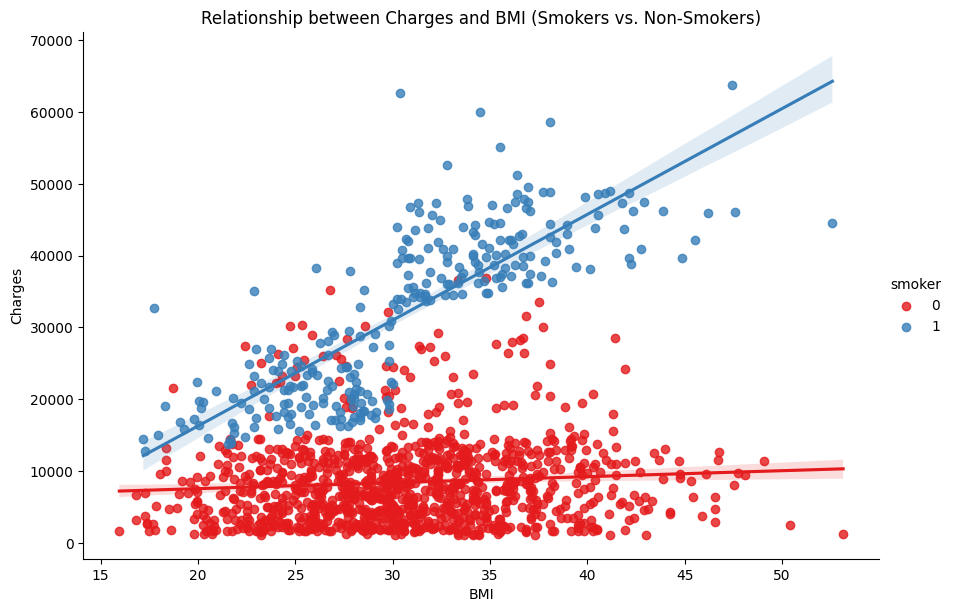

In [ ]:
# Create an lmplot of bmi vs. charges, colored by smoker.
plt.figure(figsize=(10, 6))
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set1', height=6, aspect=1.5)
plt.title('Relationship between Charges and BMI (Smokers vs. Non-Smokers)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

11b) What do you notice from the visualization? (Compare the trendlines.)

- Your Answer:
  - There is a vertical increase of smokers against high charges in charges and BMI.
  There is an horizontal increase in non smokers against low increase in the charges and high increase in BMI.

## Explore Regions

### 12\) Countplot for Regions

12a) Make a countplot to show how many customers per region.

<ipython-input-36-26d649a1fd26>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='Set2')


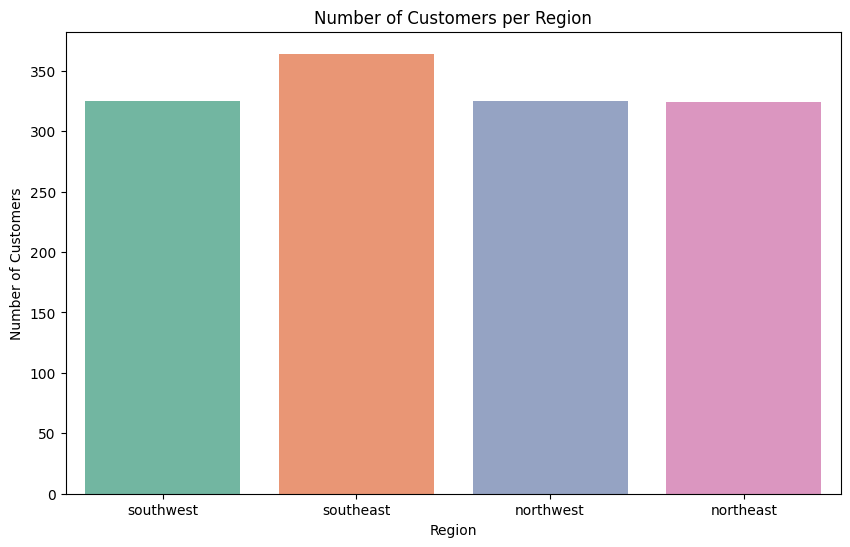

In [ ]:
# Make a countplot for region
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, palette='Set2')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

12b) Which region appears the most in this data set?

- Your Answer:
  - `...`

### 13\) Barplot of Charges by Region

13a) Make a barplot to show average charges by region.

<ipython-input-37-d5de91427774>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='charges', data=df, ci=None, palette='Set2')
<ipython-input-37-d5de91427774>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df, ci=None, palette='Set2')


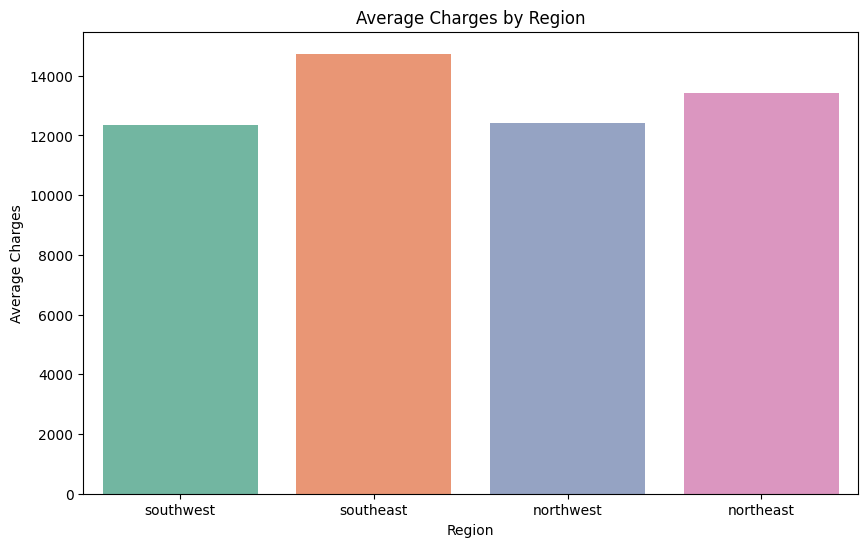

In [ ]:
# make a barplot of charges by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=df, ci=None, palette='Set2')
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

13b) Which region has the highest average charges?

- Your Answer:
  - `...`

### 14\) Bar Chart of Ratios (%) of Smokers in Each Region

14a) Calculate the ratio of smokers in each region and save it as a variable called "percent_smoker_by_region". (Hint: use .groupby with "region" combined with slicing the "smoker" column and end with .mean() )

In [ ]:
# use groupby to get the mean of smoker grouped by region

# Calculate percent of smokers in each region
percent_smoker_by_region = df.groupby('region')['smoker'].mean()

print(percent_smoker_by_region)

region
northeast    0.206790
northwest    0.178462
southeast    0.250000
southwest    0.178462
Name: smoker, dtype: float64


14b) Plot the ratios of smokers by region as a bar plot.



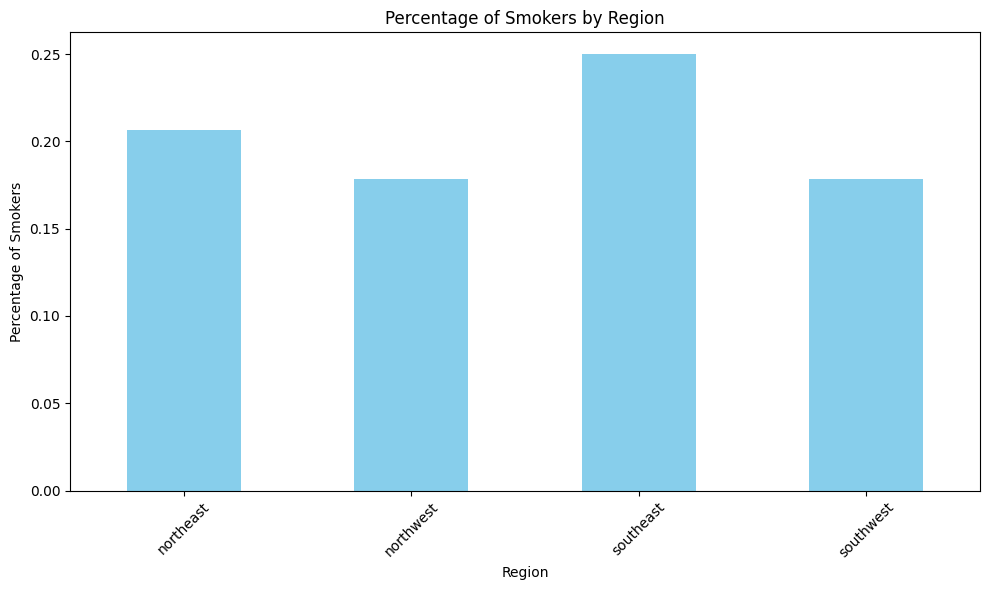

In [ ]:
# Plot the ratios (the results of then groupby above)
plt.figure(figsize=(10, 6))
percent_smoker_by_region.plot(kind='bar', color='skyblue')
plt.title('Percentage of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Smokers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

14c) Which region has the highest ratio of smokers?

- Your Answer:
  - `...`

> You've completed the assignment! Download your notebook and upload it as your submission.